In [1]:
from py_eddy_tracker.dataset.grid import RegularGridDataset

#Read in example SSH data that has been mapped onto a 0.25deg regular grid.
outdir='/work/mh0256/m301014/eddy-track/data/interim/'
grid_name, lon_name, lat_name = (
    outdir+'icon_ngc3028_0.25DEG_interp_zos.nc',
    "lon",
    "lat",
)
h = RegularGridDataset(grid_name, lon_name, lat_name)

We assume pixel position of grid is centered for /work/mh0256/m301014/eddy-track/data/interim/icon_ngc3028_0.25DEG_interp_zos.nc


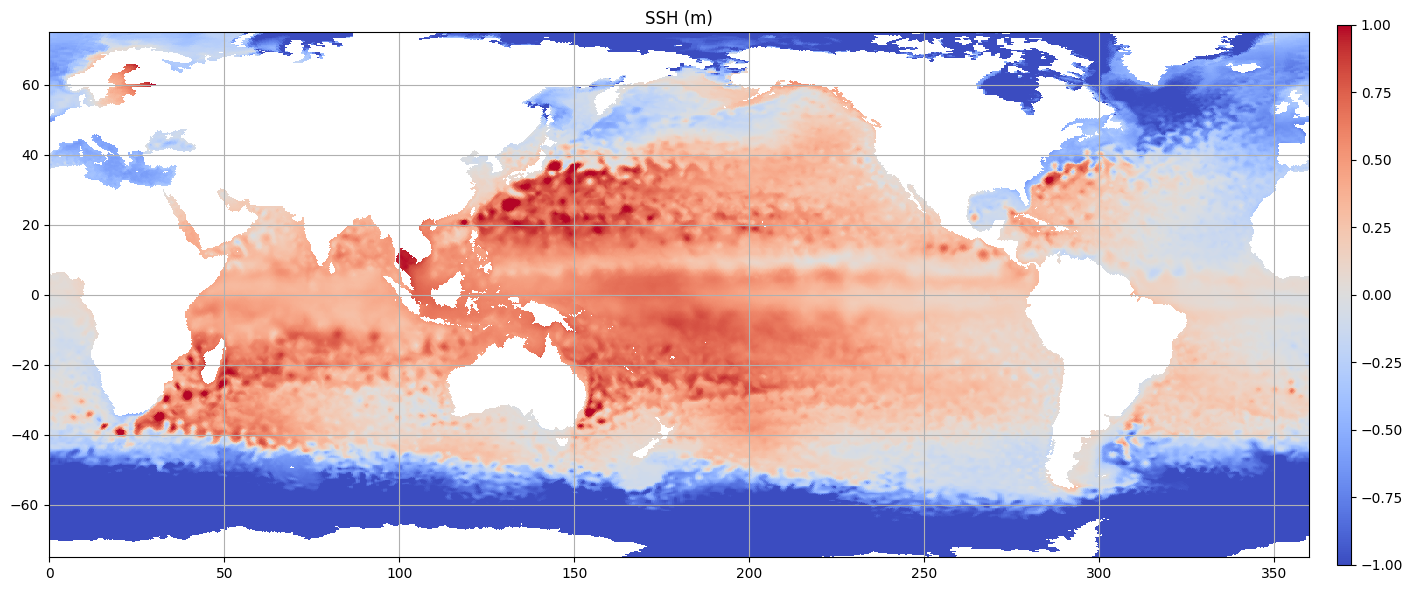

In [2]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(14, 12))
ax = fig.add_axes([0.02, 0.51, 0.9, 0.45])
ax.set_title("SSH (m)")
ax.set_ylim(-75, 75)
ax.set_aspect("equal")
m = h.display(ax, name="zos", vmin=-1, vmax=1)
ax.grid(True)
plt.colorbar(m, cax=fig.add_axes([0.94, 0.51, 0.01, 0.45]))
# plt.show()

In [3]:
# https://py-eddy-tracker.readthedocs.io/en/latest/python_module/02_eddy_identification/pet_filter_and_detection.html#sphx-glr-python-module-02-eddy-identification-pet-filter-and-detection-py
from datetime import datetime

from matplotlib import pyplot as plt
from numpy import arange

from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset

# from py_eddy_tracker import start_logger
# start_logger().setLevel("DEBUG")  # Available options: ERROR, WARNING, INFO, DEBUG

        
#Load Input grid, SSH is used to detect eddies. Add a new filed to store the high-pass filtered SSHA
g = RegularGridDataset(grid_name, lon_name, lat_name)
g.add_uv("zos")
g.copy("zos", "zos_high")
wavelength = 700  #choice of spatial cutoff for high pass filter in km
g.bessel_high_filter("zos", wavelength, order=1)
date = datetime(2020, 2, 1)



We assume pixel position of grid is centered for /work/mh0256/m301014/eddy-track/data/interim/icon_ngc3028_0.25DEG_interp_zos.nc
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
No filtering above 85.000000 degrees of latitude


In [12]:
# Run the detection for the total grid and the filtered grid
step_ht=0.005 #intervals to search for closed contours (5mm in this case)
a_filtered, c_filtered = g.eddy_identification(
    "zos_high", "u", "v",
    date,  # Date of identification
    step_ht,  # step between two isolines of detection (m)
    pixel_limit=(50, 200),  # Min and max pixel count for valid contour
    shape_error=30,  # Error max (%) between ratio of circle fit and contour
)
# Shape error gallery: how to choose your shape error. [https://py-eddy-tracker.readthedocs.io/en/latest/python_module/02_eddy_identification/pet_shape_gallery.html#sphx-glr-python-module-02-eddy-identification-pet-shape-gallery-py]
merge_f = a_filtered.merge(c_filtered)

a_tot, c_tot = g.eddy_identification(
    "zos", "u", "v",
    date,  # Date of identification
    step_ht,  # step between two isolines of detection (m)
    pixel_limit=(50, 200),  # Min and max pixel count for valid contour
    shape_error=30,  # Error max (%) between ratio of circle fit and contour
)
merge_t = a_tot.merge(c_tot)

In [13]:

def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(0,360), ax.set_ylim(-75,75)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))


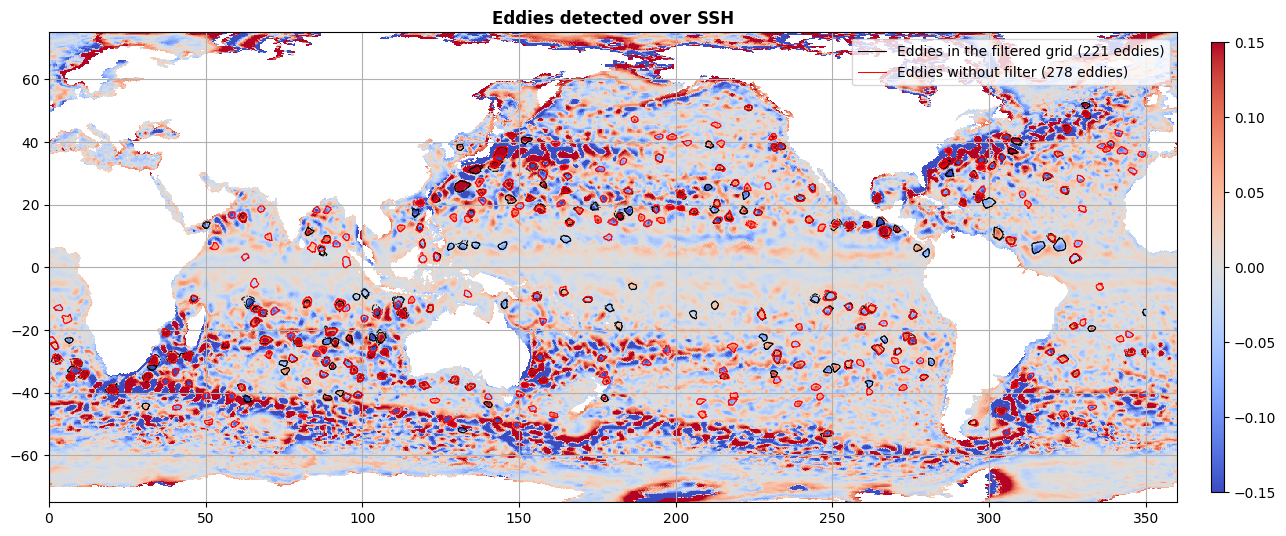

In [14]:
ax = start_axes("Eddies detected over SSH")
m = g.display(ax, "zos", vmin=-0.15, vmax=0.15)
merge_f.display(
    ax,
    lw=0.75,
    label="Eddies in the filtered grid ({nb_obs} eddies)",
    ref=-10,
    color="k",
)
merge_t.display(
    ax, lw=0.75, label="Eddies without filter ({nb_obs} eddies)", ref=-10, color="r"
)
ax.legend()
update_axes(ax, m)

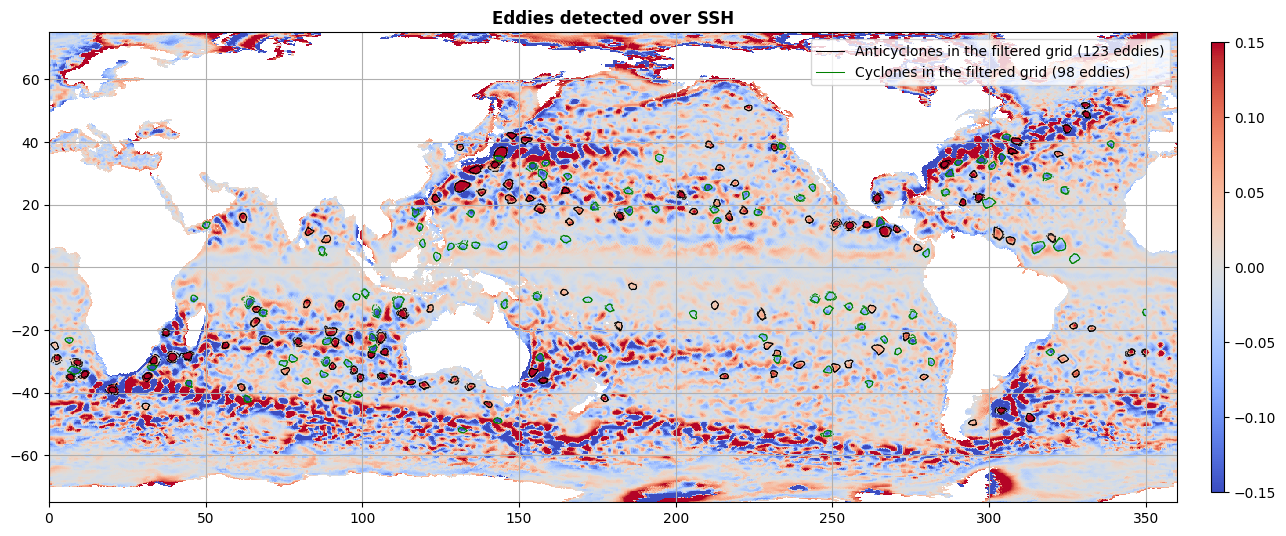

In [15]:
ax = start_axes("Eddies detected over SSH")
m = g.display(ax, "zos", vmin=-0.15, vmax=0.15)
a_filtered.display(
    ax,
    lw=0.75,
    label="Anticyclones in the filtered grid ({nb_obs} eddies)",
    ref=-10,
    color="k",
)
c_filtered.display(
    ax, lw=0.75, label="Cyclones in the filtered grid ({nb_obs} eddies)", 
    ref=-10, 
    color="green"
)
ax.legend()
update_axes(ax, m)

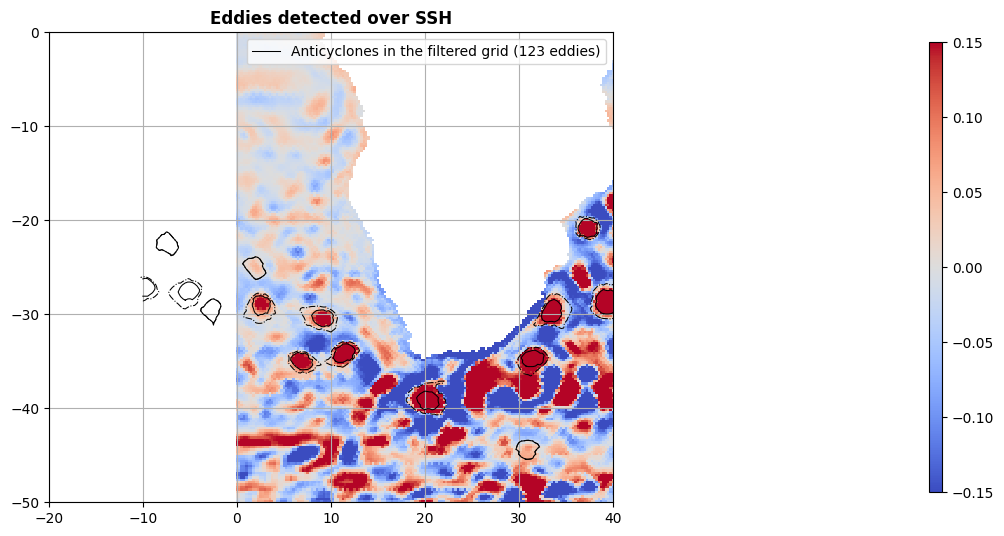

In [16]:

def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(-20,40), ax.set_ylim(-50,0)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax

ax = start_axes("Eddies detected over SSH")
m = g.display(ax, "zos", vmin=-0.15, vmax=0.15)
a_filtered.display(
    ax,
    lw=0.75,
    label="Anticyclones in the filtered grid ({nb_obs} eddies)",
    ref=-10,
    color="k",
)
# merge_t.display(
#     ax, lw=0.75, label="Cyclones in the filtered grid ({nb_obs} eddies)", 
#     ref=-10, 
#     color="green"
# )
ax.legend()
update_axes(ax, m)


In [17]:
#What is in a_filtered?
dir(a_filtered)

['COLORS',
 'ELEMENTS',
 'NB_COLORS',
 '__add__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__merge_filters__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_repr_html_',
 'add_fields',
 'add_rotation_type',
 'align_on',
 'amplitude',
 'append',
 'array_variables',
 'basic_formula_ellipse_major_axis',
 'bins_stat',
 'box_display',
 'build_var_list',
 'circle_contour',
 'coherence',
 'compare_units',
 'concatenate',
 'contains',
 'contour_lat_e',
 'contour_lat_s',
 'contour_lon_e',
 'contour_lon_s',
 'copy',
 'copy_data_to_zarr',
 'cost_function',
 'cost_function_common_area',
 'create_particles',
 'create_variable',
 'create_variable_zarr',
 'display

In [18]:
#Save output
from netCDF4 import Dataset

outtestdir='/work/bm1344/m300466/ngc3/'
with Dataset(date.strftime(outtestdir+"ngc3028_anticyclonic_"+date.strftime('%Y%m%d')+".nc"), "w") as h:
    a_filtered.to_netcdf(h)
with Dataset(date.strftime(outtestdir+"ngc3028_cyclonic_"+date.strftime('%Y%m%d')+".nc"), "w") as h:
    c_filtered.to_netcdf(h)